# Threat Detection IDS Project

This notebook builds a machine learning model for detecting network intrusions using the NSL-KDD dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


## Dataset Info
- We'll use NSL-KDD: Download tomorrow.
- Features: 41 attributes like duration, protocol, etc.
- Labels: Normal or attack types (e.g., DoS, Probe).

## Dataset Download and Exploration

In [3]:
# Column names 
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
    'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

# Load training data
train_df = pd.read_csv('../data/KDDTrain+.csv', names=columns, header=None)

# Load test data
test_df = pd.read_csv('../data/KDDTest+.csv', names=columns, header=None)

print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)
print("\nFirst 5 rows of training data:\n", train_df.head())

Training data shape: (125973, 42)
Test data shape: (22544, 42)

First 5 rows of training data:
   duration protocol_type service  flag  src_bytes  dst_bytes  land  \
0      tcp      ftp_data      SF   491          0          0     0   
0      udp         other      SF   146          0          0     0   
0      tcp       private      S0     0          0          0     0   
0      tcp          http      SF   232       8153          0     0   
0      tcp          http      SF   199        420          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                0.17   
0               0       0    0  ...                0.00   
0               0       0    0  ...                0.10   
0               0       0    0  ...                1.00   
0               0       0    0  ...                1.00   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.03                    0.17   
0                    0

In [4]:
# Check for missing values
print("Missing values in train:", train_df.isnull().sum().sum())
print("Missing values in test:", test_df.isnull().sum().sum())

# Data types
print("\nData types:\n", train_df.dtypes)

# Unique labels and counts
print("\nLabel distribution in train:\n", train_df['label'].value_counts())
print("\nLabel distribution in test:\n", test_df['label'].value_counts())

# Simplify labels: Map to 'normal' or 'attack'
attack_types = {
    'normal': 'normal',
    'back': 'attack', 'land': 'attack', 'neptune': 'attack', 'pod': 'attack', 'smurf': 'attack', 'teardrop': 'attack',
    'ipsweep': 'attack', 'nmap': 'attack', 'portsweep': 'attack', 'satan': 'attack',
    'ftp_write': 'attack', 'guess_passwd': 'attack', 'imap': 'attack', 'multihop': 'attack', 'phf': 'attack', 'spy': 'attack', 'warezclient': 'attack', 'warezmaster': 'attack',
    'buffer_overflow': 'attack', 'loadmodule': 'attack', 'perl': 'attack', 'rootkit': 'attack'
}
train_df['binary_label'] = train_df['label'].map(attack_types)
test_df['binary_label'] = test_df['label'].map(attack_types)

print("\nBinary label distribution in train:\n", train_df['binary_label'].value_counts())

Missing values in train: 0
Missing values in test: 0

Data types:
 duration                        object
protocol_type                   object
service                         object
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                      float

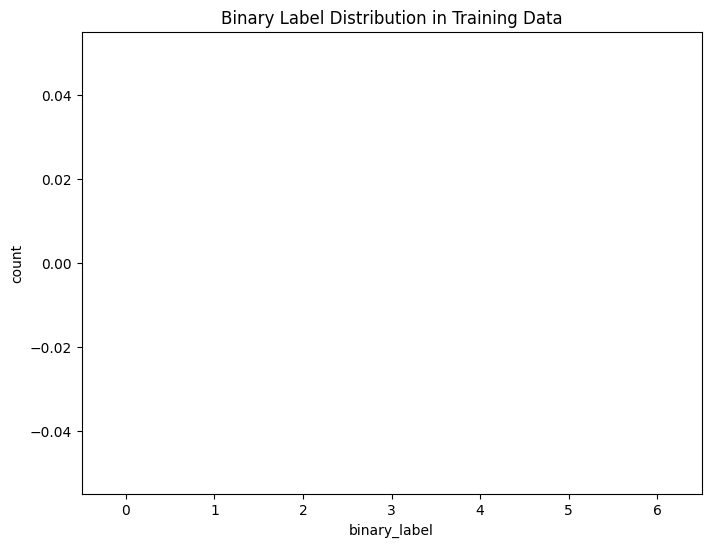

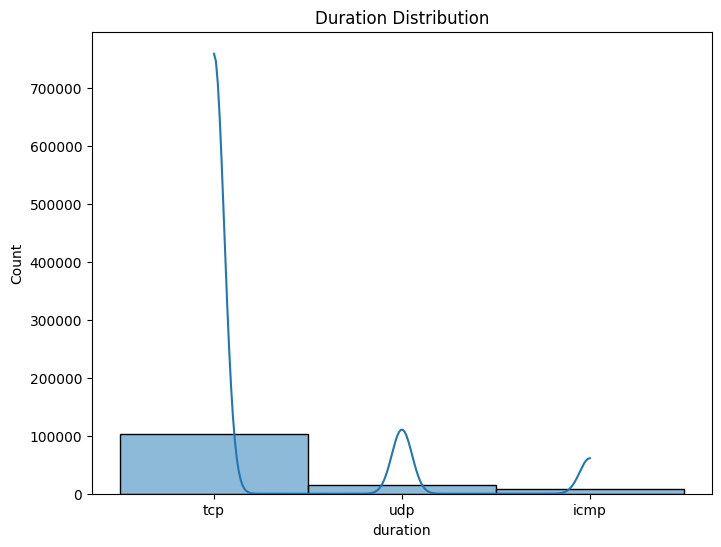

In [5]:
# Plot binary label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='binary_label', data=train_df)
plt.title('Binary Label Distribution in Training Data')
plt.show()

# Example: Duration distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_df['duration'], bins=50, kde=True)
plt.title('Duration Distribution')
plt.show()